In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = {
    'qt': [320, 336, 304, 309, 272, 248, 208, 197, 184, 176, 184],
    'Gp': [16000, 32000, 48000, 96000, 160000, 240000, 
           304000, 352000, 368000, 384000, 400000]
}

In [6]:
df = pd.DataFrame(data)

In [7]:
coefficients = np.polyfit(df['Gp'], df['qt'], 1)

Di = -coefficients[0]  # Make positive since slope is negative
qi = coefficients[1]

print(f"Linear Regression Results:")
print(f"qi = {qi:.2f} MMscf/day")
print(f"Di = {Di:.6f} day⁻¹")


Linear Regression Results:
qi = 336.29 MMscf/day
Di = 0.000401 day⁻¹


In [8]:
# Part (a): Calculate Gp when qt = 80 MMscf/day
qt_target = 80
Gp_target = (qi - qt_target) / Di
print(f"\n(a) When qt = {qt_target} MMscf/day:")
print(f"   Gp = {Gp_target:,.0f} MMscf")
print(f"   Extra from last point (400,000) = {Gp_target - 400000:,.0f} MMscf")


(a) When qt = 80 MMscf/day:
   Gp = 639,925 MMscf
   Extra from last point (400,000) = 239,925 MMscf


In [9]:
# Part (b): Calculate time
# Using Di from least squares (given in PDF as 0.000401)
Di_accurate = 0.000401

# Time to last data point (qt = 184, last in table)
t_last = np.log(qi / 184) / Di_accurate

# Time to reach qt = 80
t_to_80 = np.log(qi / qt_target) / Di_accurate
extra_time_days = t_to_80 - t_last
extra_time_years = extra_time_days / 365.25

print(f"\n(b) Time calculations:")
print(f"   Time to last point (184 MMscf/day): {t_last:.0f} days = {t_last/365.25:.3f} years")
print(f"   Time to reach 80 MMscf/day: {t_to_80:.0f} days = {t_to_80/365.25:.3f} years")
print(f"   Extra time: {extra_time_days:.0f} days = {extra_time_years:.3f} years")




(b) Time calculations:
   Time to last point (184 MMscf/day): 1504 days = 4.117 years
   Time to reach 80 MMscf/day: 3581 days = 9.804 years
   Extra time: 2077 days = 5.687 years


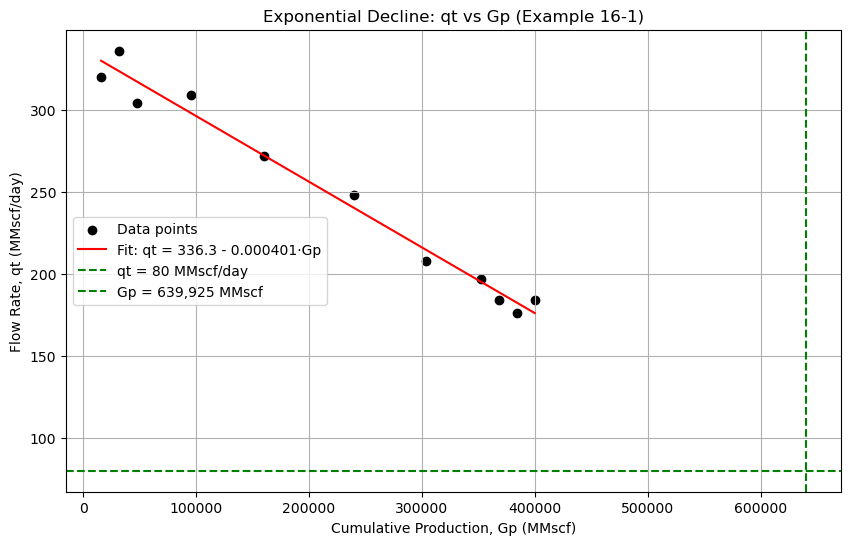


Summary Table:
          Parameter    Value
     qi (MMscf/day)    336.3
         Di (day⁻¹) 0.000401
Gp at qt=80 (MMscf)  639,925
   Extra Gp (MMscf)  239,925
 Time to 80 (years)    9.804
 Extra time (years)    5.687


In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Gp'], df['qt'], color='black', label='Data points')
plt.plot(df['Gp'], qi - Di * df['Gp'], 'r-', label=f'Fit: qt = {qi:.1f} - {Di:.6f}·Gp')
plt.axhline(y=qt_target, color='g', linestyle='--', label=f'qt = {qt_target} MMscf/day')
plt.axvline(x=Gp_target, color='g', linestyle='--', label=f'Gp = {Gp_target:,.0f} MMscf')
plt.xlabel('Cumulative Production, Gp (MMscf)')
plt.ylabel('Flow Rate, qt (MMscf/day)')
plt.title('Exponential Decline: qt vs Gp (Example 16-1)')
plt.legend()
plt.grid(True)
plt.show()

# Create results table
results = pd.DataFrame({
    'Parameter': ['qi (MMscf/day)', 'Di (day⁻¹)', 'Gp at qt=80 (MMscf)', 
                  'Extra Gp (MMscf)', 'Time to 80 (years)', 'Extra time (years)'],
    'Value': [f"{qi:.1f}", f"{Di:.6f}", f"{Gp_target:,.0f}", 
              f"{Gp_target-400000:,.0f}", f"{t_to_80/365.25:.3f}", f"{extra_time_years:.3f}"]
})
print("\nSummary Table:")
print(results.to_string(index=False))